In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

/home/faiz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
#Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
df.left.value_counts()  / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

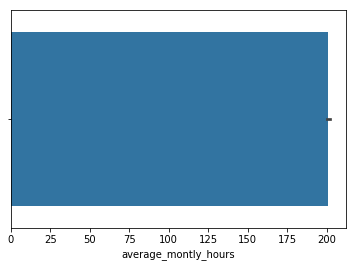

In [7]:
#Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
sns.barplot(df["average_montly_hours"])

In [8]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0

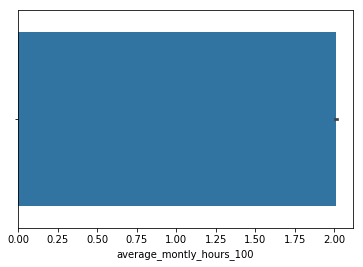

In [9]:
sns.barplot(df["average_montly_hours_100"])

In [10]:
# convert the categorical features into binary dummy columns..
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [11]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
               df_dummies], axis=1).values
y = df['left'].values

In [12]:
X.shape

(14999, 20)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train,epochs=20)

Epoch 1/20
11999/11999 [==============================] - 1s 66us/step - loss: 0.5350 - acc: 0.7671
Epoch 2/20
11999/11999 [==============================] - 1s 64us/step - loss: 0.5431 - acc: 0.7681
Epoch 3/20
11999/11999 [==============================] - 1s 86us/step - loss: 0.5398 - acc: 0.7641
Epoch 4/20
11999/11999 [==============================] - 1s 88us/step - loss: 0.5386 - acc: 0.7681
Epoch 5/20
11999/11999 [==============================] - 1s 84us/step - loss: 0.5345 - acc: 0.7681
Epoch 6/20
11999/11999 [==============================] - 1s 87us/step - loss: 0.5507 - acc: 0.7661
Epoch 7/20
11999/11999 [==============================] - 1s 65us/step - loss: 0.5121 - acc: 0.7719
Epoch 8/20
11999/11999 [==============================] - 1s 55us/step - loss: 0.5759 - acc: 0.7627
Epoch 9/20
11999/11999 [==============================] - 1s 66us/step - loss: 0.5770 - acc: 0.7601
Epoch 10/20
11999/11999 [==============================] - 1s 85us/step - loss: 0.5381 - acc: 0.7679

In [18]:
X_test

array([[0.88, 0.52, 4.  , ..., 0.  , 1.  , 0.  ],
       [0.68, 0.65, 3.  , ..., 0.  , 0.  , 1.  ],
       [0.99, 0.73, 3.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.77, 0.55, 3.  , ..., 0.  , 0.  , 1.  ],
       [0.41, 0.54, 2.  , ..., 0.  , 0.  , 1.  ],
       [0.96, 0.85, 4.  , ..., 1.  , 0.  , 0.  ]])

In [19]:
y_test_pred = model.predict_classes(X_test)

In [21]:
y_test_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df


In [27]:
# check the confusion matrix, precision and recall

pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2125,137
Leave,495,243
